<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/8/8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

In [2]:
# It takes long time to download MNIST dataset
mnist = fetch_openml('mnist_784', version=1,)

In [3]:
np.random.seed(42)
m = 5000
idx = np.random.permutation(60000)[:m]

In [4]:
X = mnist['data'][idx]
Y = mnist['target'][idx]

In [5]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced  = tsne.fit_transform(X)

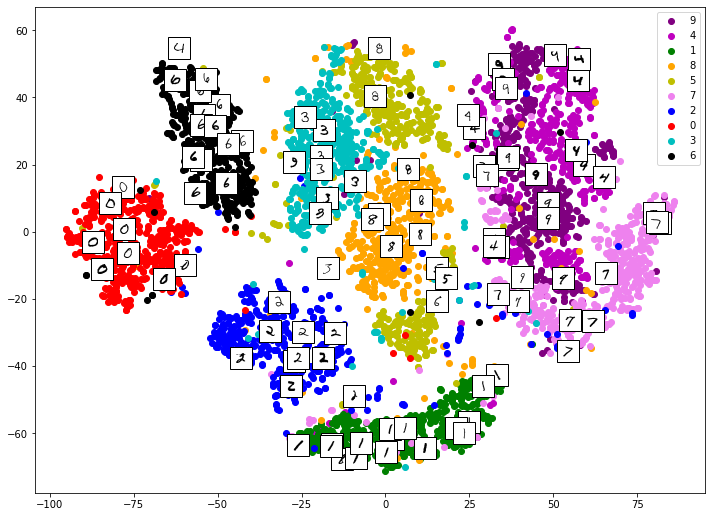

In [6]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
target_ids = range(len(set(Y)))

colors = {'0': 'r', '1': 'g', '2': 'b', '3': 'c', '4': 'm', '5': 'y', '6': 'k', '7': 'violet', '8': 'orange', '9': 'purple'}

plt.figure(figsize=(12, 10))

ax = plt.subplot(aspect='equal')
for label in set(Y):
    idx = np.where(np.array(Y) == label)[0]
    plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], c=colors[label], label=label)

for i in range(0, len(Y), 50):
    img = X[i].reshape(28, 28)
    img = OffsetImage(img, cmap=plt.cm.gray_r, zoom=0.5) 
    ax.add_artist(AnnotationBbox(img, X_reduced[i]))

plt.legend()
plt.show()